## 1. Part 1

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

from sklearn.datasets import load_boston


warnings.filterwarnings('ignore')

### 1. Load the data using Python Pandas library

In [63]:
df = pd.read_csv('mtcars.csv')

In [64]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [65]:
df.shape

(32, 12)

In [66]:
y = df.loc[:,['mpg']]
X = df.drop(columns=['mpg'])

In [67]:
X.nunique().sort_values()

vs        2
am        2
cyl       3
gear      3
carb      6
hp       22
drat     22
disp     27
wt       29
qsec     30
model    32
dtype: int64

In [68]:
cat_cols = ['vs','am','cyl','gear','carb','model']
num_cols = ['hp','drat','disp','wt','qsec']

### 2. Do Exploratory Data Analysis of the data and state your insights.

#### Null value check in the dataset 

In [69]:
X.isna().sum()

model    0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

There are no null values in the dataset

### Analyzing dependent variable

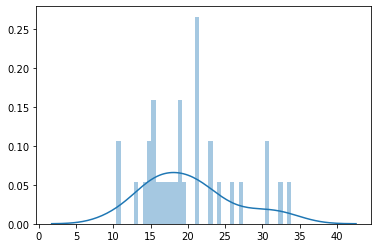

In [70]:
# Since a continous value lets use dis plot to check the distribution
ax = sns.distplot(y,bins=40)

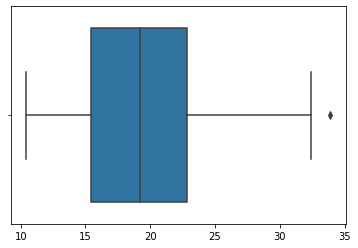

In [71]:
# Outlier check
ax = sns.boxplot(y)

We wont treat the ourlier in the dependant variable.

### Univariate analysis

#### Continuous 

hp : 146.6875 123.0 [110]
hp skewness : 0.7994066925956381

drat : 3.5965625 3.6950000000000003 [3.07]
drat skewness : 0.29278021324083486

disp : 230.72187499999998 196.3 [275.8]
disp skewness : 0.42023312147004516

wt : 3.21725 3.325 [3.44]
wt skewness : 0.4659161067929868

qsec : 17.848750000000003 17.71 [17.02]
qsec skewness : 0.4063466292404903



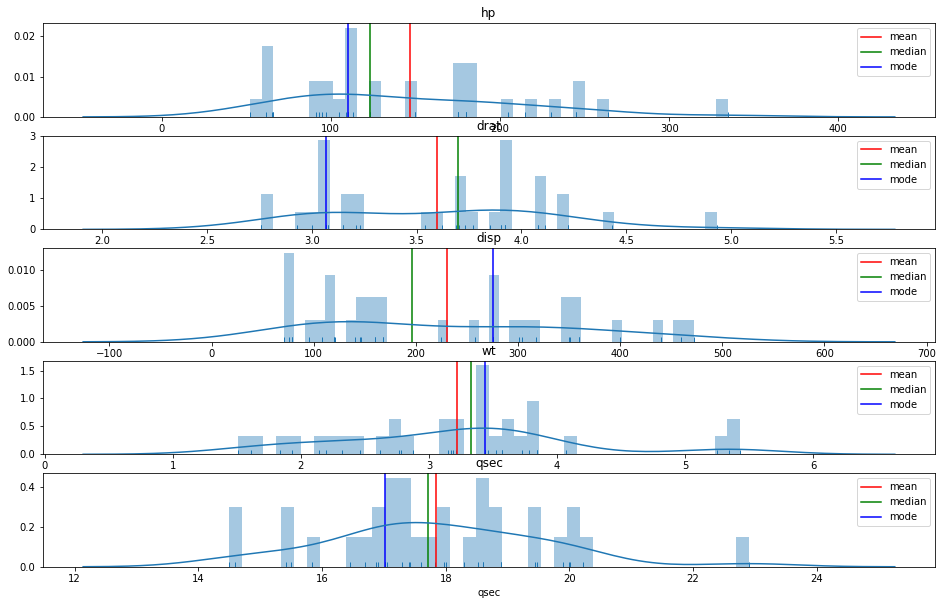

In [72]:
n = len(num_cols)
plt.figure(figsize=(16,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(n,1,i)
    mean,median,mode = np.mean(X[col]),np.median(X[col]),stats.mode(X[col])[0]
    print(col,':',mean,median,mode)
    print(col,'skewness :',X[col].skew());print()

    plt.axvline(mean,color='r',label='mean')
    plt.axvline(median,color='g',label='median')
    plt.axvline(mode,color='b',label='mode')
    plt.title(col)
    sns.distplot(X[col],bins=40,rug=True)
    plt.legend()
    
plt.show()

#### Categorical

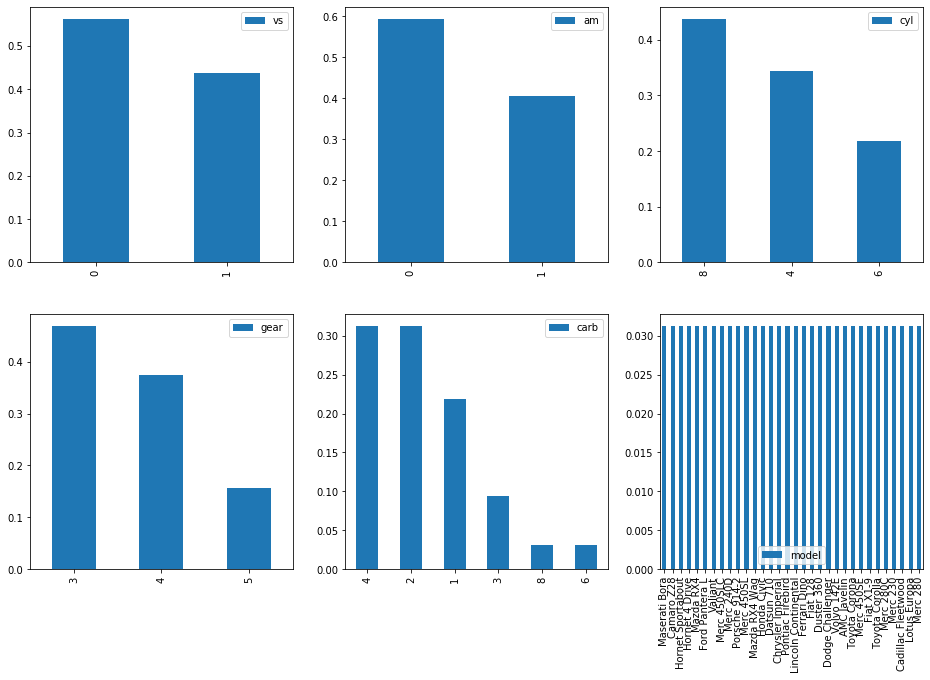

In [73]:
plt.figure(figsize=(16,16))
for i,col in enumerate(cat_cols,1):
    plt.subplot(3,3,i)
    X[col].value_counts(normalize=True).plot.bar()
    plt.legend()

### Bivariate analysis

#### Continuous vs Target(Continuous) variable 

In [74]:
len(num_cols)

5

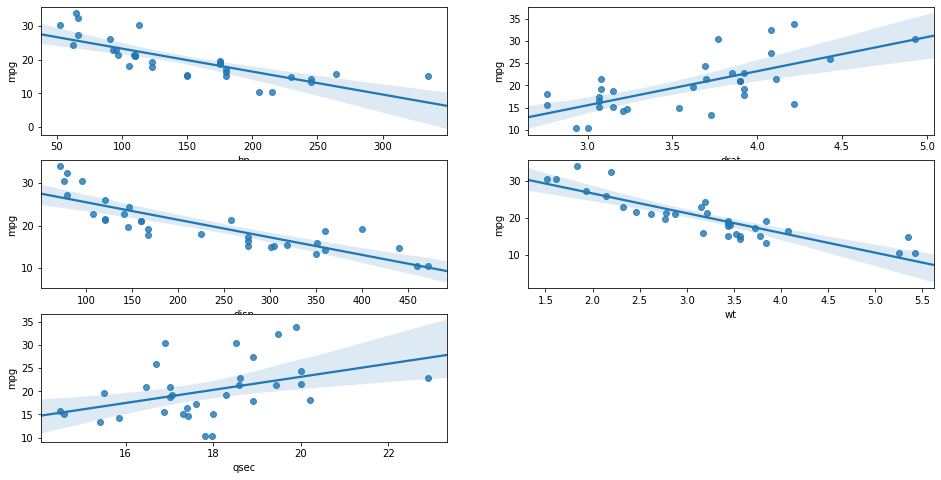

In [75]:
plt.figure(figsize=(16,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.regplot(data=df,x=col,y="mpg")

#### Categorical vs Target(Continuous) variable 

## 2. Part 2

### 1. Check whether the dataset satisfy all the regression assumption

#### a. Normality of Residuals

In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['model'] = le.fit_transform(X['model'])
X.head()

,model,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,17,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,18,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,12,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,13,8,360.0,175,3.15,3.440,17.02,0,0,3,2


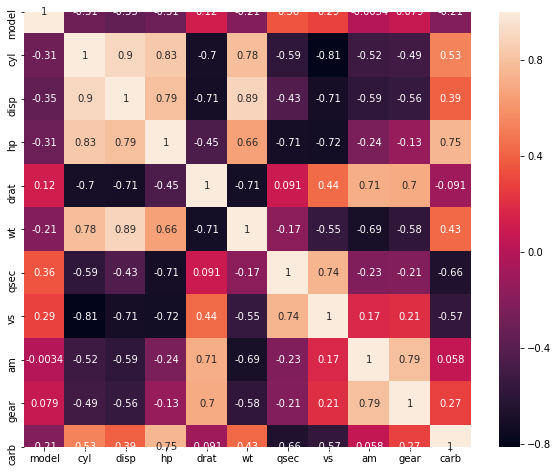

In [88]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(X.corr(),annot=True)

In [81]:
xc = sm.add_constant(X.drop(columns=['model']))
lin_reg = sm.OLS(y,xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.79e-07
Time:                        18:04:05   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### b. No Multi-colinearity

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values,i) for i,_ in enumerate(X)]
pd.DataFrame({'vif':vif},index=X.columns).sort_values('vif',ascending=False)

,vif
qsec,322.515643
wt,186.644078
drat,132.600820
gear,121.530158
cyl,112.711120
disp,109.197123
hp,57.686882
carb,33.044749
vs,8.969451
am,7.607516


#### c. No Hetroscedaticity

#### d. Autocorrelation

#### e. Linearity of relationship

### 2. Build Multiple Linear Regression model.

### 3. Get the accuracy score on train and test data